Library Import

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# imputer
from sklearn.impute import KNNImputer

# encoding , scaling
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, label_binarize

# split data
from sklearn.model_selection import train_test_split, GridSearchCV

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

# evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, mean_squared_error,roc_curve, roc_auc_score


1- DATA EXPLORATION

In [206]:
# reading data
df = pd.read_csv(r"C:\Users\dohah\Documents\Projects\Detecting Malaria Model\MachineLearningProject\dataset\healthcare-dataset-stroke-data.csv")

In [207]:
# data exploration 
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
1,1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
3,3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


In [208]:
print(df['stroke'].value_counts())
print(sum(df['stroke'].value_counts()))
print("------------------------------------------------------------------------------")
print(df.dtypes)
print("------------------------------------------------------------------------------")
print(df.isnull().sum())

stroke
0    4861
1    4861
Name: count, dtype: int64
9722
------------------------------------------------------------------------------
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
------------------------------------------------------------------------------
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  961
smoking_status         0
stroke                 0
dtype: int64


2- DATA PREPROCESSING

In [225]:
# checking for duplicate rows
print(df.duplicated().sum())

0


In [210]:
#    ----- not involved -----
# # encoding 'smoking_status' feature to detect NaN values
# le = LabelEncoder()
# df['smoking_status'] = le.fit_transform(df['smoking_status']).astype(str)

# # after encoding replace 'Unknown' stauts into NaN to handle it
# df['smoking_status'] = df['smoking_status'].replace('0', np.nan)

In [211]:
# check the missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  961
smoking_status         0
stroke                 0
dtype: int64

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9722 entries, 0 to 9721
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9722 non-null   int64  
 1   gender             9722 non-null   object 
 2   age                9722 non-null   float64
 3   hypertension       9722 non-null   int64  
 4   heart_disease      9722 non-null   int64  
 5   ever_married       9722 non-null   object 
 6   work_type          9722 non-null   object 
 7   Residence_type     9722 non-null   object 
 8   avg_glucose_level  9722 non-null   float64
 9   bmi                8761 non-null   float64
 10  smoking_status     9722 non-null   object 
 11  stroke             9722 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 911.6+ KB


In [213]:
# target selecting
target = 'stroke'

In [214]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
1,1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
3,3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


In [ ]:
# categorical featur selecting
feature_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [ ]:
# X & Y matrices

# encoding categorical features & defining numerical featurs
X_cat = encoder.fit_transform(df[feature_cols])
X_num = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']] 

In [218]:
# check handeling results
X_num.isnull().sum()

age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  961
dtype: int64

In [219]:
# handeling missing values
imputer = KNNImputer()

X_num = imputer.fit_transform(X_num) # knn imputer need 2D matrix << [[ ]] >>

# --why handling missing values after encoding? using KNNimputer needs to work on a numerical columns not categorical

In [ ]:
# merging cat with num data in featur matrix 
X = np.hstack([pd.DataFrame(X_num).values, X_cat]) # feature matrix     --- hstack : horizontal stack <nums at left , one hot at right>
# target
y = df[target] # target label 

In [222]:
# check handeling results
pd.DataFrame(X).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64

In [138]:
# X check
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,3.0,0.0,0.0,95.12,18.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,58.0,1.0,0.0,87.96,39.2,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,8.0,0.0,0.0,110.89,17.6,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,70.0,0.0,0.0,69.04,35.9,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,14.0,0.0,0.0,161.28,19.1,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [139]:
# y check
pd.DataFrame(y).head()

,stroke
0,0
1,0
2,0
3,0
4,0


In [181]:
# split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=48,
                                                    stratify=y, # need to know
                                                    shuffle=True
                                                    )


In [182]:
# scaling
scaler = StandardScaler()
X_train[:, :len(X_num)] = scaler.fit_transform(X_train[:, :len(X_num)])
X_test[:, :len(X_num)] = scaler.transform(X_test[:, :len(X_num)])

3- KNN MODEL

In [183]:
# finding best k
knn = KNeighborsClassifier()
# hyperparameter param_grid
param_grid = {'n_neighbors': np.arange(1,25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5 , scoring='accuracy') # cv: folds nomber in cross validation, 4 train 1 test 5 times, reduce overfitting
#print(knn_gscv.best_params_) -- hyperparameter best k

In [184]:
# KNN

# train the model
knn_gscv.fit(X_train, y_train)
# predict y
y_pred = knn_gscv.predict(X_test) 

4- EVALUATION

In [ ]:
target_names = ['No Stroke', 'Stroke'] 
print("KNN Results:")
cr = classification_report(y_test, y_pred, target_names=target_names)
print("classification_report : \n", cr)

KNN Results:
classification_report : 
               precision    recall  f1-score   support

   No Stroke       1.00      0.95      0.97       973
      Stroke       0.95      1.00      0.97       972

    accuracy                           0.97      1945
   macro avg       0.98      0.97      0.97      1945
weighted avg       0.98      0.97      0.97      1945



In [224]:
# accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.974293059125964


Confusion Matrix

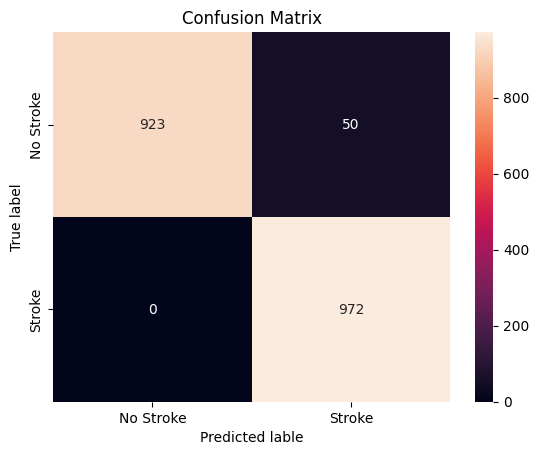

In [196]:
cm = confusion_matrix(y_test, y_pred)  

cm_df = pd.DataFrame(cm,
                     index= target_names,
                     columns= target_names)

sns.heatmap(cm_df, fmt='d', annot= True) # fmt='d' -> d means integer nombers will show
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted lable')
plt.show()



Loss Curve #Check

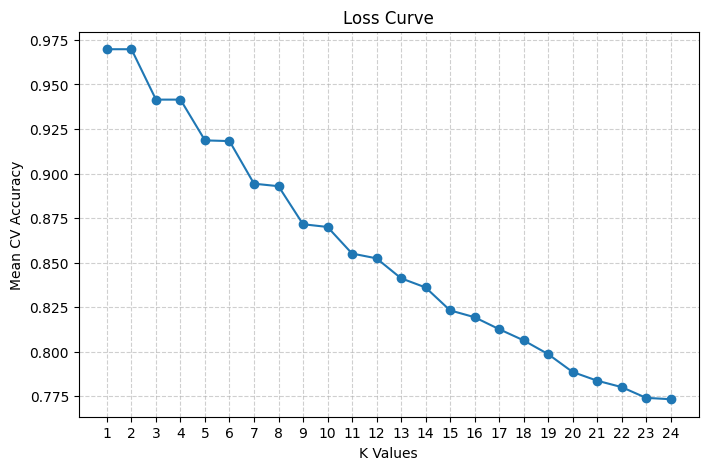

In [195]:
mean_scores = knn_gscv.cv_results_['mean_test_score']
k_values = param_grid['n_neighbors'] # from 1->24


plt.figure(figsize=(8, 5))
plt.plot(k_values, mean_scores, marker='o', linestyle='-')
plt.title('Loss Curve')
plt.xlabel('K Values')
plt.ylabel('Mean CV Accuracy')
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.6)

# Highlight the best K value
# best_k = knn_gscv.best_params_['n_neighbors']
# best_score = knn_gscv.best_score_
# plt.scatter(best_k, best_score, color='red', s=100, label=f'Best K: {best_k:.0f}')

plt.show()

ROC

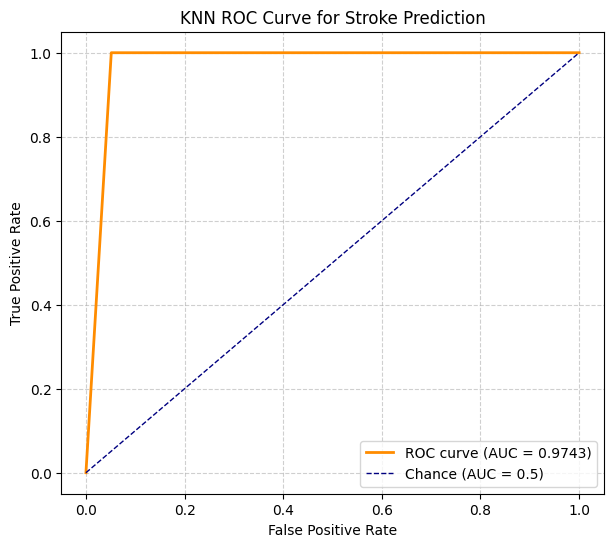

In [199]:
#     ---- need a check ----

# احتمالات الكلاس 1 فقط
y_score_knn = knn_gscv.predict_proba(X_test)[:, 1]

# حساب FPR و TPR و AUC
fpr, tpr, _ = roc_curve(y_test, y_score_knn)
roc_auc = roc_auc_score(y_test, y_score_knn)

# رسم منحنى ROC
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Chance (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve for Stroke Prediction')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
